In [ ]:
# Correr esto para importar scian_datagenerator.py directamente desde el drive. 
# sino puede copiarse manualmente en el menú de la izquierda

# Mount your google drive in google colabfrom google.colab import drive
# This will prompt for authorization.
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/Sem_interno_NN_2021/Codigos/Sciann-Laplace')

Mounted at /content/drive


In [1]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
#!pip install sciann
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.2 
Python Version: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:14) 
[Clang 12.0.1 ] 

Outdated SciANN installation is found (V-0.6.7.3). Get the latest version (V-0.6.7.5):  
      > pip [--user] install --upgrade sciann  


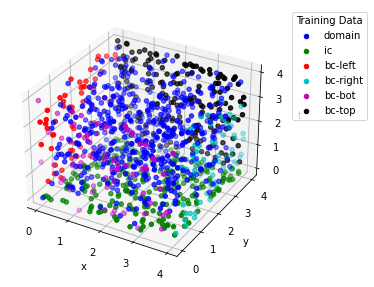

In [2]:
#dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=1000)
#dg = DataGeneratorXT([0.,1.], [0.,1.],num_sample=1000)
dg = DataGeneratorXYT([0.,4.], [0.,4.], [0.,4.],num_sample=1000)
dg.plot_data()

In [3]:
t = sn.Variable('t')
x = sn.Variable('x')
y = sn.Variable('y') # esto queda para la proxima ;)

v = sn.Functional('v', [x,y,t], 4*[40], 'tanh', res_net=True)

In [4]:
L1 = sn.diff(v, x, order=1) + sn.diff(v, y, order=1) + sn.diff(v, t, order=1)

#BC_top1 = (y==1.)*(x<0.5)*sn.abs(T - 2*x)
#BC_top2 = (y==1.)*(x>=0.5)*sn.abs(T - (2-2*x))
#BC_right = (x==1.)*sn.abs(T)
#BC_bot = (y==0.)*sn.abs(T)
IC = (t==0.)*sn.abs(v-sn.sin(x*y))
BC_left = (x==0.)*sn.abs(v)
BC_bot = (y==0.)*sn.abs(v)


In [5]:
#m = sn.SciModel([x,y], [L1, BC_top1, BC_top2, BC_left, BC_right, BC_bot], optimizer='adam')
m = sn.SciModel([x,y,t], [L1, IC, BC_left,BC_bot], optimizer='adam')

In [10]:
dg = DataGeneratorXYT([0.,4.], [0.,4.],[0.,4.], num_sample=10000, 
                     targets=['domain', 'ic', 'bc-left', 'bc-bot'])
input_data, target_data = dg.get_data()

In [7]:
h = m.train(input_data, target_data, 
            epochs=100,
            learning_rate=0.001,
            batch_size=200,
            adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True}
           )


Total samples: 11250 
Batch size: 200 
Total batches: 57 


+ NTK evaluation time [s]: 3.649040937423706 

+ adaptive_weights at epoch 1: [0.37787600792362874, 0.3529984981578723, 1.4119113577084925, 1.8572141362100063]
Epoch 1/100
57/57 [==============================] - 5s 34ms/step - batch: 28.0000 - size: 197.3684 - loss: 0.9804 - add_2_loss: 0.1671 - mul_2_loss: 0.4659 - mul_3_loss: 0.1421 - mul_4_loss: 0.2972 - lr: 0.0010 - time: 8.6598 - loss_weight_0: 0.3779 - loss_weight_1: 0.3530 - loss_weight_2: 1.4119 - loss_weight_3: 1.8572 - loss_gradient_0: 1113.6664 - loss_gradient_1: 1526.1191 - loss_gradient_2: 542.2710 - loss_gradient_3: 491.5057
Epoch 2/100
57/57 [==============================] - 1s 21ms/step - batch: 28.0000 - size: 197.3684 - loss: 0.1699 - add_2_loss: 0.0401 - mul_2_loss: 0.3779 - mul_3_loss: 0.0067 - mul_4_loss: 0.0065 - lr: 0.0010 - time: 1.2527 - loss_weight_0: 0.3779 - loss_weight_1: 0.3530 - loss_weight_2: 1.4119 - loss_weight_3: 1.8572 - loss_gradient_0: 

In [ ]:
x_test, y_test, t_test = np.meshgrid(np.linspace(0,4,100), np.linspace(0,4,100),np.linspace(0,4,100))

In [ ]:
print(y_test[9,30,99])
print(Y[9,30])

0.09090909090909091
0.09090909090909091


In [ ]:
v_test = v.eval([x_test, y_test, t_test])

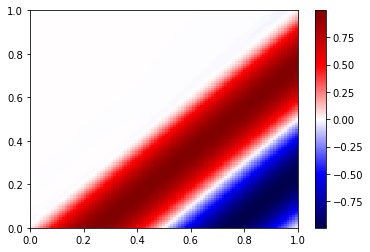

In [ ]:
im = plt.pcolor(x_test, t_test, v_test, cmap='seismic')#, shading='auto')
plt.colorbar(im)

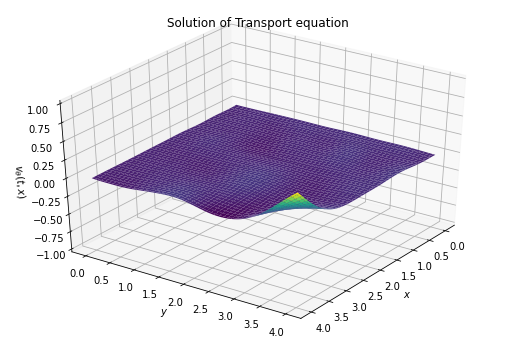

In [ ]:
#%matplotlib qt
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

# Set up meshgrid
N = 100
#tspace = np.linspace(0, 2, N)
xspace = np.linspace(0, 4, N)
yspace = np.linspace(0, 4, N)
X, Y = np.meshgrid(xspace, yspace)

#Xgrid = np.vstack([T.flatten(),X.flatten()]).T
# Determine predictions of u(t, x)
#upred = model(tf.cast(Xgrid,DTYPE))

v_test = v.eval([x_test, y_test, t_test])
#v_test = v.eval([X, T])

# Reshape upred
#U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution v(x,t)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test[:,:,80], y_test[:,:,80], v_test[:,:,80], cmap='viridis');
#ax.plot_surface(x_test[:,:,99], y_test[:,:,99], np.sin(x_test[:,:,99]*y_test[:,:,99]), cmap='viridis');
ax.view_init(35,35)
ax.set_zlim((-1,1))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$v_\\theta(t,x)$')
ax.set_title('Solution of Transport equation');

In [ ]:
%matplotlib qt

ImportError: ignored

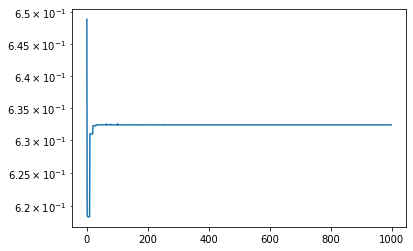

In [ ]:
plt.semilogy(h.history['loss'])